#Unsupervised Learning
• Topics:
K-Means, Hierarchical Clustering, DBScan

we have a dataset that have the input features X, but
 do not have the labels y, unsupervised learning comes into play.

 **Recall** Iris data set<br>
 **Unsupervised learning example:** Manufacturing items labeled as defective or not?

#Clustering

**Clustering:** the goal is to group similar instances together into clusters. This is a
great tool for data analysis, customer segmentation, recommender systems,
and more.

For example: Plant groups.

There is no universal definition of what a cluster is: it really depends on the context,
and different algorithms will capture different kinds of clusters. For example, some
algorithms look for instances centered around a particular point, called a **centroid.**
Others look for continuous regions of densely packed instances: these clusters can
take on any shape. Some algorithms are **hierarchical**, looking for clusters of clusters

#K-Means Clustering



K-means clustering is a method in data mining and machine learning to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. It's a way to identify and group similar data points together.

Here's how it works step-by-step:

Initialize: Choose K, the number of clusters you want.

Centroids: Randomly initialize K centroids (the central points of clusters).

Assignment: Assign each data point to the nearest centroid. This forms K clusters.

Update: Compute the mean of each cluster and update the centroid to this mean.

Repeat: Perform the assignment and update steps until the centroids no longer move, or a set number of iterations is reached.

To illustrate, let's use the SciKit-Learn library's make_blobs function to generate a synthetic dataset and apply K-means clustering.

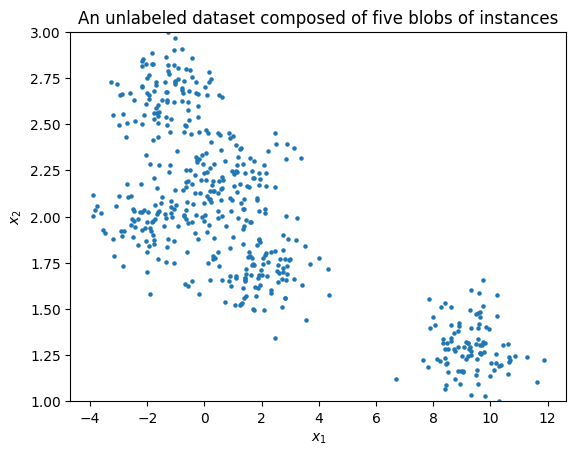

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate the dataset with a wider y-axis range
X, y = make_blobs(n_samples=500, centers=5, n_features=2, random_state=0)

# Calculate the minimum and maximum y-values
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])

# Scale and shift the y-values to fit within the desired range
X[:, 1] = (X[:, 1] - y_min) / (y_max - y_min)  # Normalize to 0-1 range
X[:, 1] = X[:, 1] * 2 + 1  # Scale and shift to 1-3 range

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('An unlabeled dataset composed of five blobs of instances')
plt.ylim(1, 3)  # Set the y-axis limits
plt.show()

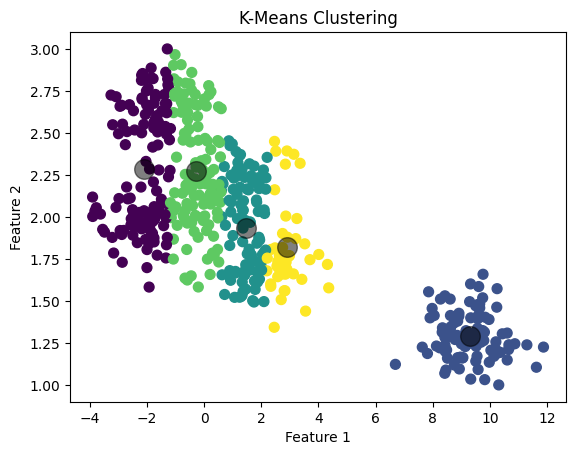

In [ ]:
# Apply K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[-2.08157951,  2.2860054 ],
       [ 9.30286933,  1.2933211 ],
       [ 1.45191584,  1.93528084],
       [-0.26339435,  2.272796  ],
       [ 2.88833966,  1.82270343]])

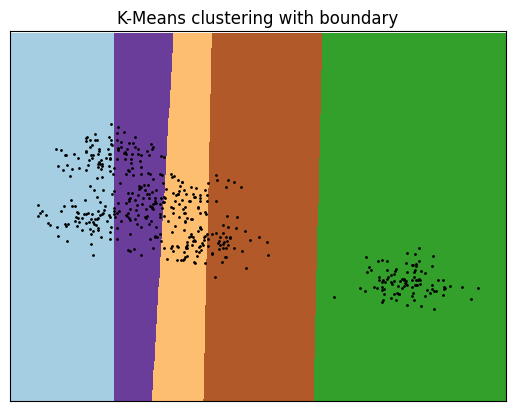

In [ ]:
# Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict cluster labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundaries
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
plt.title('K-Means clustering with boundary')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

The vast majority of the instances were clearly assigned to the appropriate cluster, but
a few instances were probably mislabeled (especially near the boundary between the
2nd, 3rd and 4th region.

So how does the algorithm work? Well it is really quite simple. Suppose you were
given the centroids: you could easily label all the instances in the dataset by assigning
each of them to the cluster whose centroid is closest. Conversely, if you were given all
the instance labels, you could easily locate all the centroids by computing the mean of
the instances for each cluster. But you are given neither the labels nor the centroids,
so how can you proceed? Well, just start by placing the centroids randomly (e.g., by
picking k instances at random and using their locations as centroids). Then label the
instances, update the centroids, label the instances, update the centroids, and so on
until the centroids stop moving. The algorithm is guaranteed to converge in a finite
number of steps (usually quite small), it will not oscillate forever2
. You can see the
algorithm in action in Figure: the centroids are initialized randomly (top left),
then the instances are labeled (top right), then the centroids are updated (center left),
the instances are relabeled (center right), and so on. As you can see, in just 3 itera‐
tions the algorithm has reached a clustering that seems close to optimal.

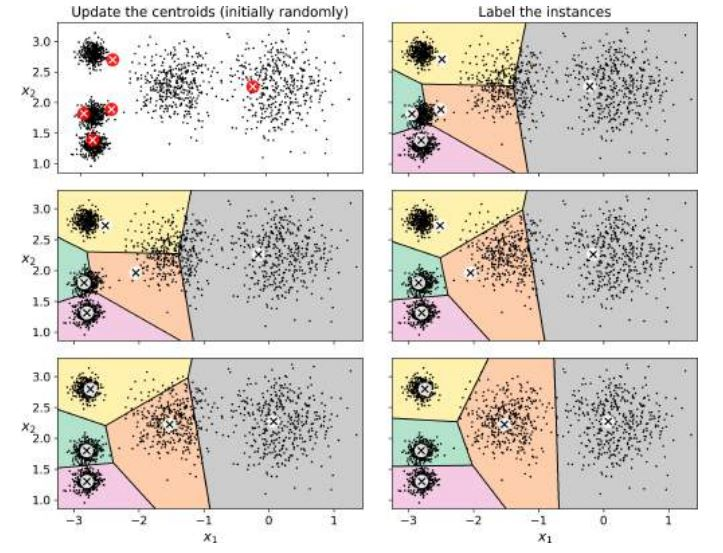

**Finding the Optimal Number of Clusters**
So far, we have set the number of clusters k to 5 because it was obvious by looking at
the data that this is the correct number of clusters. But in general, it will not be so
easy to know how to set k, and the result might be quite bad if you set it to the wrong
value.

You might be thinking that we could just pick the model with the lowest inertia,
right? Unfortunately, it is not that simple. The inertia for k=3 is 653.2, which is much
higher than for k=5 (which was 211.6), but with k=8, the inertia is just 119.1. The
inertia is not a good performance metric when trying to choose k since it keeps get‐
ting lower as we increase k. Indeed, the more clusters there are, the closer each
instance will be to its closest centroid, and therefore the lower the inertia will be.

##Selecting the number of clusters k using the “elbow rule”
The
inertia is not a good performance metric when trying to choose k since it keeps getting lower as we increase k. Indeed, the more clusters there are, the closer each
instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s
plot the inertia as a function of k

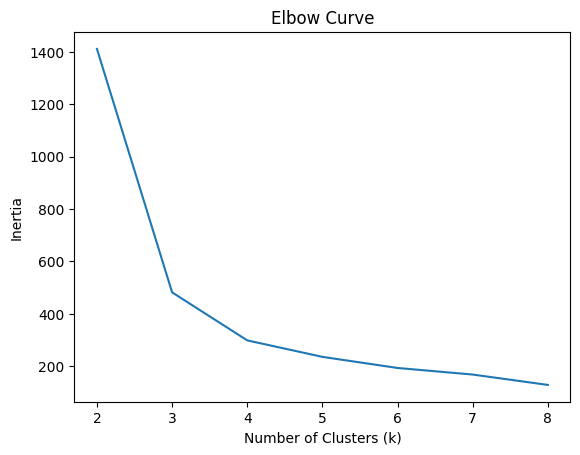

In [ ]:
# Create an empty list to store inertia values
inertia_values = []

# Test different values of k
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 9), inertia_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

As you can see, the inertia drops very quickly as we increase k up to 4, but then it
decreases much more slowly as we keep increasing k. This curve has roughly the
shape of an arm, and there is an “elbow” at k=4 so it can be a good choice.

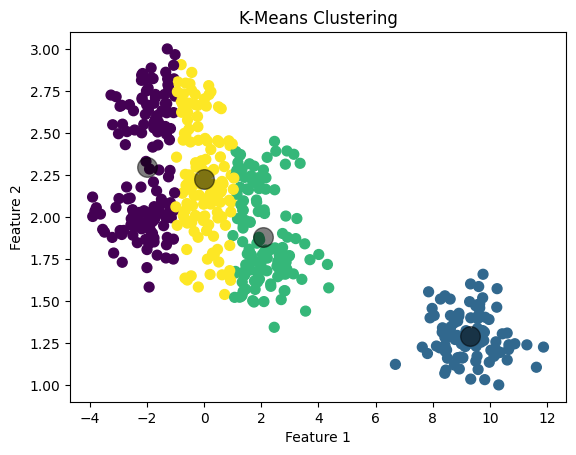

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

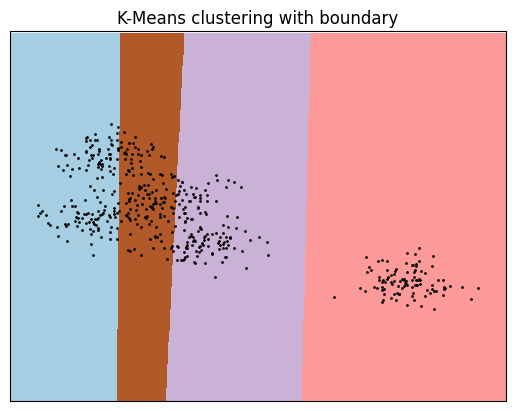

In [ ]:
# Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict cluster labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundaries
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
plt.title('K-Means clustering with boundary')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Silhouette Score

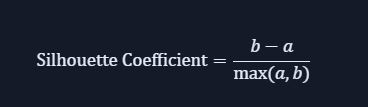

a = Mean distance of the point to other points in the same cluster (intra-cluster distance)

b = Mean distance of the point to points in the nearest neighboring cluster (nearest-cluster distance)

and it's value goes from +1 to 0 to -1

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.5717863275911744)

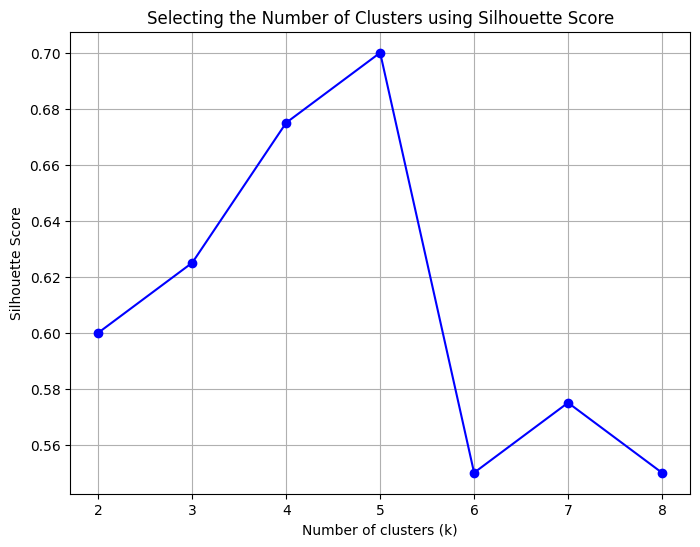

In [ ]:
import matplotlib.pyplot as plt

# Example data — replace with your actual silhouette scores
k_values = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = [0.6, 0.625, 0.675, 0.7, 0.55, 0.575, 0.55]

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Selecting the Number of Clusters using Silhouette Score')
plt.grid(True)
plt.show()


#Hierarchical clustering

hierarchical clustering, groups objects into a cluster hierarchy

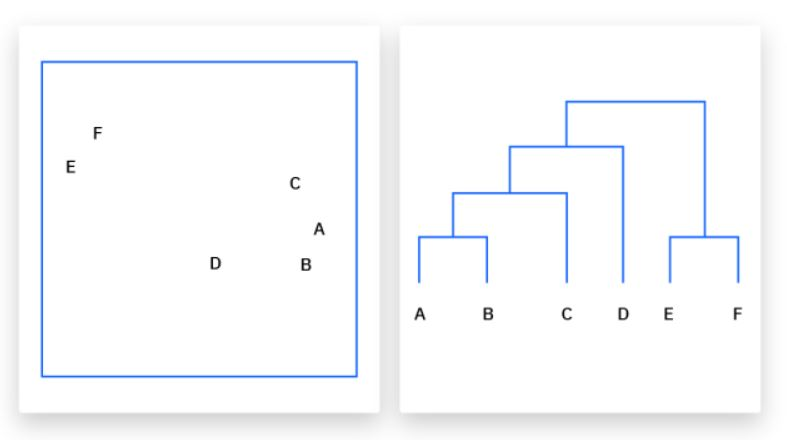

##Types
It can be divided into two types:

**Agglomerative (bottom-up):** that repeatedly merges clusters into larger ones until a single cluster emerges.

**Divisive (top-down):**  starts with all data in a single cluster and continues to split out successive clusters until all clusters are singletons.

##Agglomerative Clustering

Here's how agglomerative clustering works step-by-step:

Initialization: Start with each data point as a single cluster.

Merge Clusters: At each step, merge the two closest clusters, defined by a distance metric.

Repeat: Continue merging until only one cluster remains or the desired number of clusters is achieved.

##Linkage Methods

**1. Single Linkage**
Single linkage, also known as minimum linkage, merges the clusters based on the shortest distance between them.


In single linkage, clusters tend to form long chains, which can sometimes lead to elongated, stringy shapes. It focuses on the nearest points of the clusters.

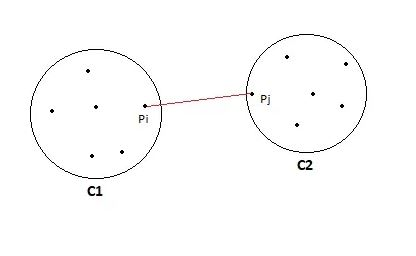

**2. Complete Linkage**
Complete linkage, also known as maximum linkage, merges the clusters based on the farthest points between them.


Complete linkage tends to create more compact and spherical clusters, as it considers the furthest points, ensuring that all elements of a cluster are close to each other.

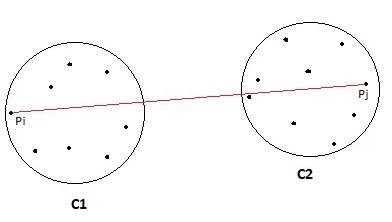

**3. Average Linkage**
Average linkage merges clusters based on the average distance between all points of the clusters.


Average linkage finds a balance between single and complete linkage, often resulting in clusters that are neither too compact nor too elongated.

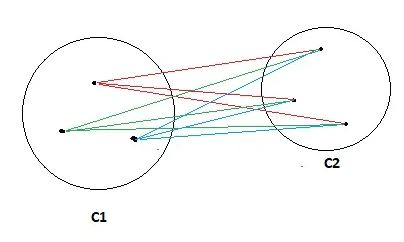



**4. Ward's Linkage**
Ward's linkage minimizes the total within-cluster variance, essentially aiming to create clusters that are as compact as possible.


Ward's linkage typically produces clusters that are spherical and compact, making it a popular choice for many applications.

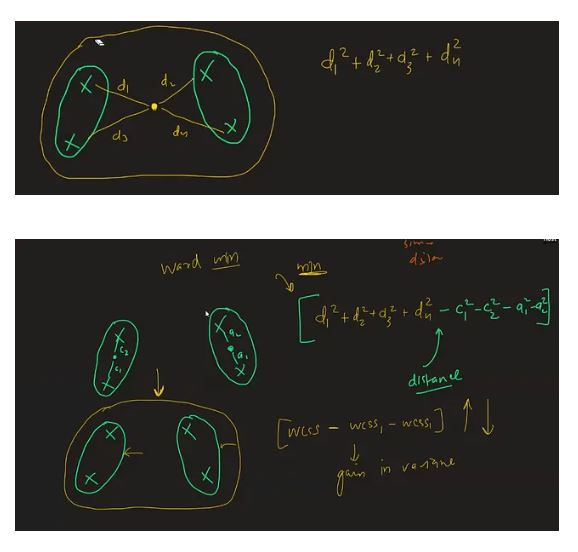

In [ ]:
import pandas as pd

data = {'Student_ID': [1, 2, 3, 4, 5],
        'Marks': [10, 7, 28, 20, 35]}

df = pd.DataFrame(data)

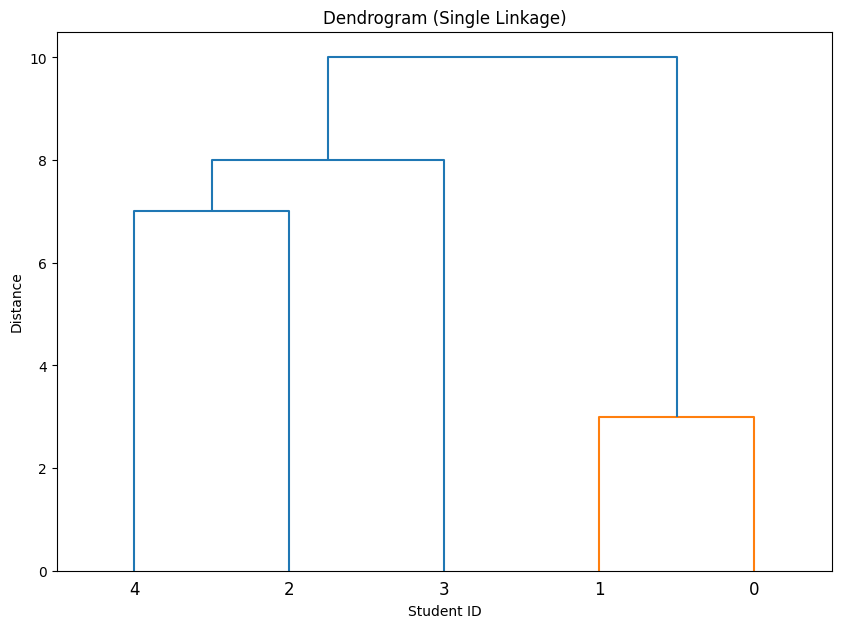

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the distance matrix using Euclidean distance
linked = linkage(df[['Marks']], 'single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Student ID')
plt.ylabel('Distance')
plt.show()

##How to Choose the Number of Clusters in Hierarchical Clustering?

To determine the optimal number of clusters, we can draw a horizontal line across the dendrogram. The number of vertical lines intersected by the line represents the number of clusters.

In this case, if we draw a horizontal line at a distance of around 7, it intersects 3 vertical lines. This suggests that 3 clusters would be a reasonable choice.

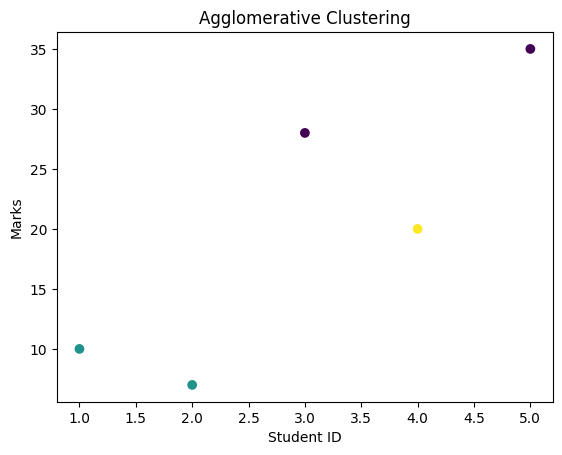

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create a hierarchical clustering model with 3 clusters
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')

# Fit the model to the data
cluster.fit_predict(df[['Marks']])

# Add the cluster labels to the dataframe
df['Cluster'] = cluster.labels_

# Visualize the clusters
plt.scatter(df['Student_ID'], df['Marks'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Student ID')
plt.ylabel('Marks')
plt.title('Agglomerative Clustering')
plt.show()

#Lecture finished here, next real world examples and applications for study!!

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Pima Indian Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
dataset = pd.read_csv(url, names=column_names)





In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Select the features for clustering
features = dataset[['Glucose', 'BMI']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

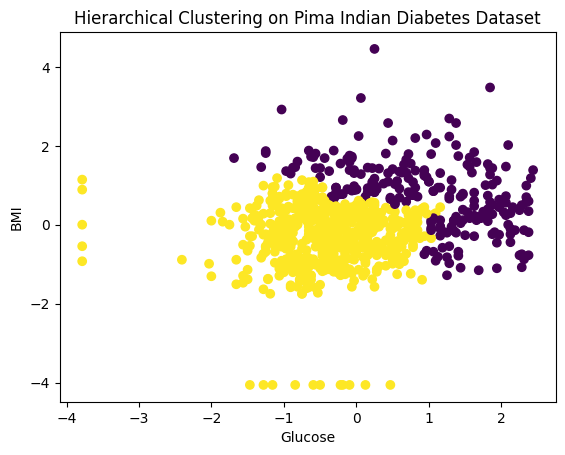

In [ ]:
# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2)
cluster_labels = cluster.fit_predict(features_scaled)

# Plot the clusters
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Hierarchical Clustering on Pima Indian Diabetes Dataset')
plt.show()

##Applications of Clustering:

**For customer segmentation:** you can cluster your customers based on their pur‐
chases, their activity on your website, and so on. This is useful to understand who
your customers are and what they need, so you can adapt your products and
marketing campaigns to each segment. For example, this can be useful in recom‐
mender systems to suggest content that other users in the same cluster enjoyed.

**For anomaly detection (also called outlier detection):** any instance that has a low
affinity to all the clusters is likely to be an anomaly. For example, if you have clus‐
tered the users of your website based on their behavior, you can detect users with
unusual behavior, such as an unusual number of requests per second, and so on.
Anomaly detection is particularly useful in detecting defects in manufacturing, or
for fraud detection.

**For semi-supervised learning:**if you only have a few labels, you could perform
clustering and propagate the labels to all the instances in the same cluster. This
can greatly increase the amount of labels available for a subsequent supervised
learning algorithm, and thus improve its performance.

**For search engines:** for example, some search engines let you search for images
that are similar to a reference image. To build such a system, you would first
apply a clustering algorithm to all the images in your database: similar images
would end up in the same cluster. Then when a user provides a reference image,
all you need to do is to find this image’s cluster using the trained clustering
model, and you can then simply return all the images from this cluster.

**Anomaly detection:** the objective is to learn what “normal” data looks like, and
use this to detect abnormal instances, such as defective items on a production
line or a new trend in a time series.

**Density estimation:** this is the task of estimating the probability density function
(PDF) of the random process that generated the dataset. It is also used
for anomaly detection: instances located in very low-density regions are likely to
be anomalies.